In this file; we will focus on 3 sections:
- 1. Introduction to `SVM (supported vector machine)`
- 2. Soft Margin SVM & Kernel SVM
- 3. Multi-class SVM

------------------------

## 1. Introduction to `SVM (support vector machine)`

**1.1. What is `SVM`?** A ***`SVM`*** is a ***`supervised learning`*** models with associated learning algorithms that analyze data used for `classification` and `regression analysis`. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

Moreover, `SVM` can efficiently perform a non-linear classification using what is called the `kernel trick`-which will be discussed in section 2.

------------------------

**1.2. How does the `SVM` work?** Suppose that our `data` has the `features` **x** and the `labels` $y$, we denote the

$$ \left( \textbf{x}_{1},y_{1} \right), \left( \textbf{x}_{2},y_{2}  \right),\ldots \left( \textbf{x}_{N},y_{N} \right),\quad \textbf{x}_{k}\in\mathbb{R}^{d} $$

where $d$ and $N$ be the number of features and the observations respectively.

------------------------

To imagine easier, we first will discuss with $d = 2$ and the `label` at each observations is defined `1 (class 1)` and `-1 (class 2)`, as in `PLA (perceptron learning algorithm)`. *The `data points` that are closer to the hyperplane and influence the position and orientation of the hyperplane are called the **`support vector`**.*
  
Look at the image below, 
- The **`solid black`** line is called the **`decision surface/ boundary`** (in mathematics, we considered as a `maximum margin hyperplane`) to seperate the datapoint into 2 classes.
- The 2 **`dashed dot green`** lines can be called as the **`positive (class) hyperplane`** and **`negative(class) hyperplane`**, and the data-points on these lines is the **`suport vectors`**
- The width between the 2 `dashed dot green` lines is called a `margin`.

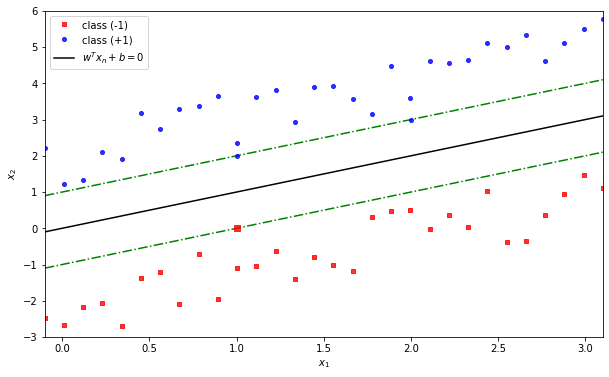

In [1]:
## ......................... Hiden code .............................. ##
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.1, 3.1, 30)
y1 = x - np.log2( np.random.uniform(1, 4, 30) ) - 1.1
y2 = x + np.log2( np.random.uniform(1, 3, 30) ) + 1.2
y = x

plt.figure(figsize = (10, 6))
plt.plot(x, y - 1, 'g-.', markersize = 10)
plt.plot(x, y + 1, 'g-.', markersize = 10)
plt.plot(x, y1, 'rs', markersize = 4, alpha = .8, label = 'class (-1)')
plt.plot([1], [0], 'rs', markersize = 6, alpha = .8)
plt.plot(x, y2, 'bo', markersize = 4, alpha = .8, label = 'class (+1)')
plt.plot([1, 2], [2, 3], 'bo', markersize = 4, alpha = .8)
plt.plot(x, y, 'k', markersize = 15, label = '$w^T x_n + b = 0$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-0.1, 3.1)
plt.ylim(-3, 6)
plt.legend()

- Come back the problem, the `solid black line`

$$ \textbf{w}^{T} \textbf{x} + b = w_{1}x_{1}+w_{2}x_{2}+b=0 $$

divide the data-points into 2 classes, and now we must determine the coefficients $\textbf{w} = (w_1, w_2)$ and $b$.

- Remind that the distance from a data-point $\textbf{x} = \left( x_1, x_2, \ldots, x_d \right)$ to the hyperplane $(H_{\textbf{w}}) : \left( w_1 z_1 + w_2 z_2 + \ldots w_d z_d + b = 0 \right)$ defined by

$$ d(x, H_{\textbf{w}}) = \dfrac{\left \vert w_1 x_1 + w_2 x_2 + \ldots w_d x_d + b \right \vert}{\Vert \textbf{w} \Vert_2} $$

where $\Vert . \Vert_2$ be the `Euclidean norm` in $\mathbb{R}^d.$

- Now at the data-point $\left( \textbf{x}_n, y_n \right)$, the `distance` to the hyperplane $(H_{\textbf{w}})$ will be calculated by

$$ \dfrac{ y_n \left( \textbf{w}^T \textbf{x}_n + b \right) }{\Vert \textbf{w} \Vert_2} $$

Indeed, if $\textbf{w}^T \textbf{x}_n + b \leq 0$ then $\textbf{x}_n$ is in `class (-1)` and $\textbf{w}^T \textbf{x}_n + b \geq 0$ then $y_n$ is in `class 1`; so `sgn`$(y_n) =$ `sgn`$\left( \textbf{w}^T \textbf{x}_n + b \right)$ and

$$ y_n \left( \textbf{w}^T \textbf{x}_n + b \right) \geq 0. $$

------------------------

#### 1.2.1. What is `Margin`?.

The `SVM` in particular defines the `criterion` to be ***looking for a decision surface that is maximally far away from any data point***. The `distance` from the `decision surface` to the `closest data point` determines the `margin` of the classifier, defined by

$$ \underset{n}{\text{argmin}}\dfrac{y_{n}\left(\textbf{w}_{n} \textbf{x}_{n}+b\right)}{\Vert \textbf{w} \Vert_{2}} $$

------------------------

#### 1.2.2. The `optimal problem`?.

Now, the `optimal problem` in `SVM algorithm` is determining the $\textbf{w}$ and $b$ to maximize the `margin`; that is

$$ \left(\textbf{w}^{*},b^{*}\right) = \underset{\left(\textbf{w},b\right)}{\text{argmax}}\left\{ \underset{n}{\min}\dfrac{y_{n}\left(\textbf{w}^{T}\textbf{x}_{n}+b\right)}{\Vert\textbf{w}\Vert_{2}}\right\} =\underset{\left(\textbf{w},b\right)}{\text{argmax}}\left\{ \Vert\textbf{w}\Vert_{2}^{-1}\underset{n}{\min}y_{n}\left(\textbf{w}^{T}\textbf{x}_{n}+b\right)\right\}  $$

------------------------

To simplify this problem, we replace $\textbf{w}$ by $k \textbf{w}$ and $b$ by $kb$ where $k$ is a positive constant, then
$$ d\left( \left( \mathbf{x}_n, y_n \right), H_{k\textbf{w}} \right) = \dfrac{ y_n \left( k \textbf{w}^T \textbf{x}_n + kb \right) }{\Vert k \textbf{w} \Vert_2} = d\left( \mathbf{x}_n, H_{\textbf{w}} \right) $$

hence, without loss of generality, we suppose that
$$ y_{n^{*}} \left( \mathbf{w}^T\mathbf{x}_{n^{*}} + b \right) = 1 $$
for the datapoint $\mathbf{x}_{n^{*}}$ which is nearest the `decision surfaces (hyperplanes)` (see the image bellow)!

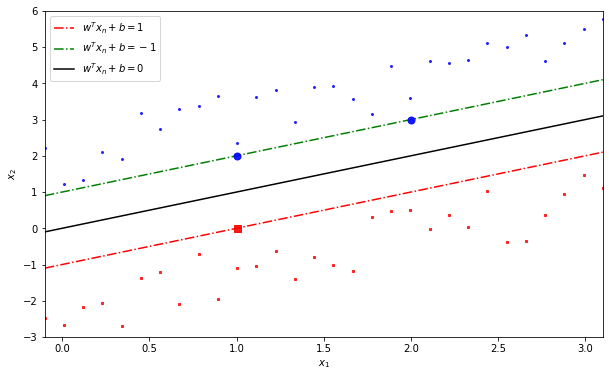

In [2]:
##........................... Hiden code ----------------------------- ##

plt.figure(figsize = (10, 6))
plt.plot(x, y - 1, 'r-.', markersize = 10, label = '$w^T x_n + b = 1$')
plt.plot(x, y + 1, 'g-.', markersize = 10, label = '$w^T x_n + b = -1$')
plt.plot(x, y1, 'rs', markersize = 2, alpha = .8)
plt.plot([1], [0], 'rs', markersize = 7, alpha = .9)
plt.plot(x, y2, 'bo', markersize = 2, alpha = .8)
plt.plot([1, 2], [2, 3], 'bo', markersize = 7, alpha = .9)
plt.plot(x, y, 'k', markersize = 15, label = '$w^T x_n + b = 0$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.xlim(-0.1, 3.1)
plt.ylim(-3, 6)
plt.legend()

By the above assumption; the distance from all the datapoint to the `decision boundary` is greater than $1$, and the `optimal problem` becomes

$$ \begin{array}{lcl}
(P) & : & \left(\textbf{w}^{*},b^{*}\right)=\underset{\left(\textbf{w},b\right)}{\text{argmax}}\Vert\textbf{w}\Vert_{2}^{-1},\\
\text{subject to} & : & y_{n}\left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right)\geq 1, \quad \forall n = 1, \ldots, N.
\end{array} $$

or equivalentlt with,

$$ \begin{array}{ccl}
(P) & : & \left(\textbf{w}^{*},b^{*}\right)=\underset{\left(\textbf{w},b\right)}{\text{argmin}}\Vert\textbf{w}\Vert_{2},\\
\text{s.t.} & : & 1 - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) \leq 0, \quad \forall n = 1, \ldots, N.
\end{array} $$

------------------------

Since the `objective function` $\Vert\textbf{w}\Vert_{2}$ is `strictly convex` which implies that the solution of $(P)$ is `unique`. 
- The disadvantages of this problem is when the dimension $d$ and the number of observations $N$ are too large enough ($N >> n_0, d >> d_0$).
- The advantages of this algorithm is it can be used for the `non-linear seperable` dataset by considering the `conjugate_problem` of $(P)$.

------------------------

**How to define the `class`.** Clearly,
$$ \text{class}(\textbf{x}) = \text{sgn} \left( \textbf{w}^T \textbf{x} + b \right). $$

To use `SVM` for the `linearly seperable dataset` in `Python` and `sklearn` :

In [3]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5)

For example, when the dataset is `nonlinear seperable`, we can use

In [4]:
poly_clf = SVC(kernel = 'poly')
rbf_clf = SVC(kernel = 'clf')
sigmo_clf = SVC(kernel = 'sigmoid')

Before study the `real-life-application example`, we will take a look at the `conjugate problems`.

### 1.3. `Conjugate problem.`

The problem $(P)$ now is the `convex problem`,  if $(P)$ holds the `Slater condition` then holds the `strong duality`; which leads to *`solution of "strong_duality_problem" is the solution of the "KKT_problem"`*

------------------------

**1.3.1. Slater condition.** In mathematics, `Slater's condition` is a sufficient condition for strong duality to hold for a convex optimization problem, such as

$$ \begin{array}{ccl}
(P) & : & \left(\textbf{w}^{*},b^{*}\right)=\underset{\left(\textbf{w},b\right)}{\text{argmin}} \frac{1}{2} \Vert\textbf{w}\Vert_{2}^2,\\
\text{s.t.} & : & f_n(\mathbf{x}) = 1 - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) \leq 0, \quad \forall n = 1, \ldots, N.
\end{array} $$

------------------------

- For all $n = 1, \ldots, N;$ if there exists $\textbf{w}, b$ such that
$$ f_n(\textbf{x}) < 0 \Leftrightarrow 1 - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) < 0 $$
then $(P)$ holds the `strong duality`.

- Now, we will verify this condition on $(P)$, noting that the `feasible region` (or `feasible set` / `solution space`) of $(P)$ in `non-empty`. Indeed, our 2_classes are `linearly seperable`, then $\exists (\textbf{w}_0, b_0)$ such that our 2 classes is seperated by the hyperplane $(H_{\textbf{w}, b})$. So we have
$$ \begin{array}{rcl}
1-y_{n}\left( \textbf{w}_{0}^{T}\textbf{x}_{n}+ b\right) & \leq & 0,\quad\forall n=1,\ldots,N\\
\Rightarrow 2-y_{n}\left(\left( 2\textbf{w}_{0}^{T}\right) \textbf{x}_{n}+\left(2b\right)\right) & \leq & 0,\quad\forall n=1,\ldots,N\\
\Rightarrow 1-y_{n}\left( \textbf{w}_{1}^{T}\textbf{x}_{n} + b_1 \right) \leq  -1 & < & 0,\quad\forall n=1,\ldots,N
\end{array} $$
by choosing
$$ \textbf{w}_1 = 2 \textbf{w}_0 \text{ and } b_1 = 2b_0 ,$$
hence the `Slater condition` holds.

- So the `Lagrangian function` of $(P)$ be
$$ L\left(\lambda, \textbf{w}, b\right) = \frac{1}{2}\Vert \textbf{w} \Vert_{2}^2 + \sum_{n=1}^{N}\lambda_{n}f_{n}\left( \textbf{x} \right)=\frac{1}{2}\Vert \textbf{w} \Vert_{2}^2 + \sum_{n=1}^{N}\lambda_{n}\left(1-y_{n}\left( \textbf{w}_{n}\textbf{x}_{n} + b\right)\right) $$
where $\lambda = \left( \lambda_1, \ldots, \lambda_N \right)^T; \lambda_n \geq 0, \quad \forall n = 1, \ldots, N. $

**1.3.2. Conjugate problem and `Lagrangian conjugate function`.**

**`Lagrangian conjugate function`** now defined by

$$ L_{\text{conj}} \left( \lambda \right) = \inf_{\left(\textbf{w}, b\right)} L \left(\lambda, \textbf{w}, b\right)$$

------------------------

Since $L$ be convex, hence considering the equation 

$$\left \lbrace \begin{array}{ccl} \dfrac{\partial L}{\partial \textbf{w}} &=& 0 \\ \dfrac{\partial L}{\partial b} &=& 0 \end{array} \right.$$

then, $L$ attain the infinimum at $\left( \textbf{w}_c, b_c \right)$, and hence

$$ L_{\text{conj}}\left(\lambda\right) = \sum_{n=1}^N \lambda_n - \dfrac{1}{2} \sum_{n=1}^N \sum_{m=1}^N \lambda_n \lambda_m y_n y_m \textbf{x}_n^T \textbf{x}_m $$

where

$$\left \lbrace \begin{array}{ccl} \textbf{w}_c &=& \sum_{n=1}^{N}\lambda_{n}y_{n}\textbf{x}_{n} \\ b_c &=& y_n - \textbf{w}_c^T \textbf{x}_n, \quad \text{ for any } \textbf{x}_n \text{ such that } \lambda_n \neq 0, \end{array} \right.$$

------------------------

**`Conjugate problem`**

Now, the conjugate function becomes
$$ L_{\text{conj}}(\lambda) = \textbf{1}^T \lambda -\dfrac{1}{2} \lambda^T \textbf{M}^T \textbf{M} \lambda  $$
where
$$ \textbf{M} = \left( y_1 \textbf{x}_1 ,\ldots, y_N \textbf{x}_N \right) = \left( \begin{array}{ccccc} y_1 x_{11} & y_2 x_{21} & \ldots & y_N x_{N1} \\ y_1 x_{12} & y_2 x_{22} & \ldots & y_N x_{N2} \\ \cdots & \cdots & \ddots & \cdots \\ y_1 x_{1d} & y_2 x_{2d} & \ldots & y_N x_{Nd} \end{array} \right) $$

and the corresponding `conjugate problem` is
$$ \left \lbrace \begin{array}{ccl} (P_c) &: & \lambda_c^{*} = \underset{\lambda}{\text{argmax}} \left( L_{\text{conj}} \left(\lambda \right) \right) \\ \text{s. t.} &: & \lambda_n \geq 0, \quad \forall n \\ & & \sum_{n=1}^N \lambda_n y_n = 0 \end{array} \right. $$

**1.3.3. KKT condition.** Since the `Slater condition` holds which implies the `strong duality` then the solution will satisfy the following `KKT condition`, that is
$${\displaystyle \left\lbrace \begin{array}{ccl}
1-y_{n}\left(\textbf{w}^{T}\textbf{x}_{n}+b\right) & \leq & 0,\quad\forall n\\
\lambda_{n} & \geq & 0\\
\lambda_{n}\left(1-y_{n}\left(\textbf{w}^{T}\textbf{x}_{n}+b\right)\right) & = & 0,\quad\forall n\\
\textbf{w} & = & \sum_{n=1}^{N}\lambda_{n}y_{n}\textbf{x}_{n}\\
\sum_{n=1}^{N}\lambda_{n}y_{n} & = & 0
\end{array}\right.} $$ 

------------------------

Noting that $\forall n, y_n^2 = 1,$ then if any data-points $\textbf{x}_n$ satisfies the Eq 

$$ \textbf{w}^T \textbf{x} + b = \pm 1 $$ 

then $\textbf{x}_n$ is called the **`support vectors`**. In fact, the number of `observations` satifies $\textbf{w}^T \textbf{x} + b = \pm 1$ usually accounts for a very small number in the total N points, even without any data-points!

------------------------

Observe that almost the $\lambda_n = 0$, hence the $\lambda \in \mathbb{R}^N$ ís called the `sparse vector` and the `SVM problem` is considered as the `Sparse Models`.

To solve the `KKT problem` by considering $\lambda_n = 0$ or $\lambda_n \neq 0,$ we have $2^N$ cases at all. After that, we can find the $\textbf{w}$ and $b$

$$ \left \lbrace \begin{array}{ccl} \textbf{w}_c &=& \sum_{n=1}^{N}\lambda_{n}y_{n}\textbf{x}_{n} \\ b_c &=& \vert S \vert^{-1} \left(  \sum_{n \in S} y_n - \textbf{w}_c^T \textbf{x}_n \right), \end{array} \right. $$

where $S = \lbrace n : \lambda_n \neq 0 \rbrace$

------------------------

Determining which class containing the datapoint $\textbf{x}$ in is equivalent to determining the sign of the term

$$ \textbf{w}^T\textbf{x} + b = \sum_{n\in S}\lambda_{n}y_{n}\textbf{x}^{T}\textbf{x }+\frac{1}{\vert S\vert}\sum_{m\in S}\left(y_{n}-\sum_{n\in S}\lambda_{n}y_{n}\textbf{x}_{m}^{T}\text{x}_{n}\right) $$

**Example 1.1**

In [5]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A **`“pairs plot”`** is also known as a `scatterplot`, in which one variable in the same data row is matched with another variable's value, below: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

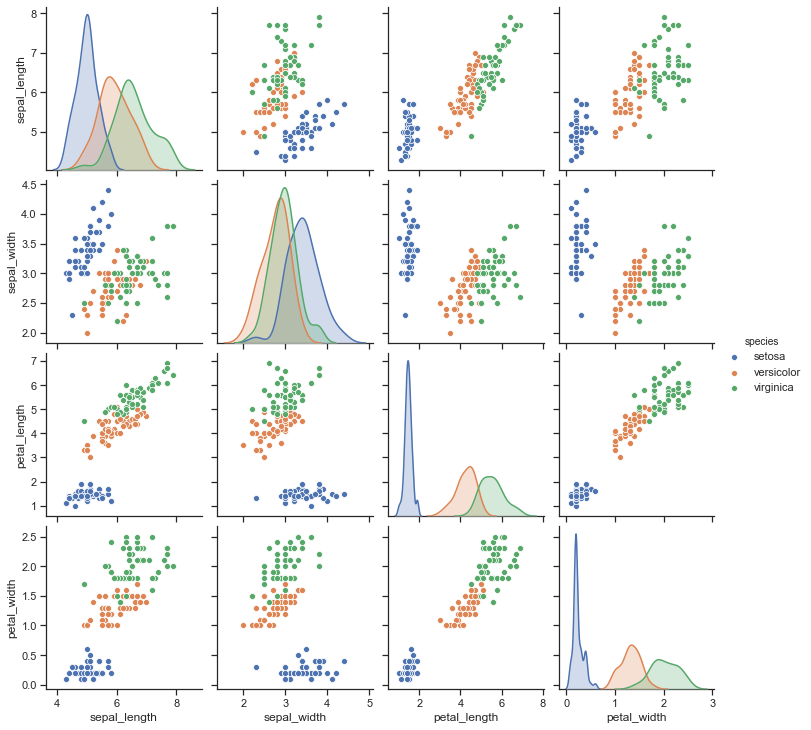

In [6]:
sns.pairplot(iris, hue="species")

Look at the `pair-plot` of `iris dataset`, there are many kinds of features is `linearly seperable`.

To demonstrate the `kernel = "linear"` in `SVM algorithm`, we will focus on `"petal_length", "petal_width"` of the first 100 observations (`species = "setosa", "versicolor"`)

To convenient, we labeled `"setosa"` by `1 (class 1)` and `"versicolor"` by `-1`

In [7]:
N = 50
X = iris[['petal_length' , 'petal_width']][: 100].values
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 
Y = y.reshape((2*N, ))
X.shape, y.shape

((100, 2), (1, 100))

Fit the model then find the **w** and $b$ in `sklearn`

In [8]:
clf.fit(X, Y) 

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

w =  [[-1.29411744 -0.82352928]]
b =  [3.78823472]


Now, we will check again by matrix computation

In [9]:
# conda install -c conda-forge cvxopt and pip install cvxopt
from cvxopt import matrix, solvers
from scipy.spatial.distance import cdist

N = 50

X1 = iris[['petal_length' , 'petal_width']][: 50].values
X2 = iris[['petal_length' , 'petal_width']][50: 100].values
X = iris[['petal_length' , 'petal_width']][: 100].values
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 
y = y.reshape((2*N, 1))

y = y.T

V = np.concatenate((X1.T, -X2.T), axis = 1)
K = matrix(V.T.dot(V)) # see definition of V, K near eq (8)

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

## Find lambda
l = np.array(sol['x'])
epsilon = 1e-6      # just a small number, greater than 1e-9
S = np.where(l > epsilon)[0]
X = X.T
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]

## calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

## print the results
print('w = ', w.T)
print('b = ', b)
print('lambda = ', l.T)

w =  [[-1.29411766 -0.82352941]]
b =  3.788235312234862
lambda =  [[2.13568277e-10 2.13568277e-10 1.82477548e-10 2.62494125e-10
  2.13568277e-10 1.38459313e-09 2.68363092e-10 2.62494125e-10
  2.13568277e-10 2.03630468e-10 2.62494125e-10 3.48366774e-10
  1.74546881e-10 1.29513094e-10 1.61116995e-10 4.89349553e-10
  2.69343607e-10 2.68363092e-10 8.44583178e-10 3.51222608e-10
  5.21255949e-10 4.89349553e-10 1.33867116e-10 1.96602635e-09
  6.21101020e-10 3.48366774e-10 7.78793538e-10 2.62494125e-10
  2.13568277e-10 3.48366774e-10 3.48366774e-10 4.89349553e-10
  2.03630468e-10 2.13568277e-10 2.62494125e-10 1.61116995e-10
  1.82477548e-10 1.74546881e-10 1.82477548e-10 2.62494125e-10
  2.19294038e-10 2.19294038e-10 1.82477548e-10 1.99809270e-09
  1.17647056e+00 2.68363092e-10 3.48366774e-10 2.13568277e-10
  2.62494125e-10 2.13568277e-10 6.95670354e-11 7.02520104e-11
  6.67977794e-11 1.05473031e-10 6.89941382e-11 7.56055222e-11
  6.68235495e-11 5.89635537e-10 7.31942480e-11 1.05921833e-10
  3.

Build-in a function to plot the `decision region` for 2 classes!

In [10]:
def decision_plot(X, y, kernel, class1_lab, class2_lab, xlab, ylab, 
                  class1_color, class2_color, sv_color, cm_type, 
                  C = 1.0, deg = 3, gamma = 1):
    fignum = 1
    # fit the model
    clf = SVC(C = C, kernel = kernel, degree = deg, gamma = gamma)
    clf.fit(X, y)
    
    N = int(X.shape[0]/2)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(12, 5))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')

    plt.axis('tight')
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(7, 5))
    plt.pcolormesh(XX, YY, Z > 0, cmap= cm_type)  ## plt.cm.spring
    plt.contour(XX, YY, Z, colors=[sv_color, sv_color, sv_color], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.scatter(X[:, 0][: N], X[:, 1][: N], marker = 'o', color = class1_color, label = class1_lab)
    plt.scatter(X[:, 0][N: ], X[:, 1][N: ], marker = 'o', color = class2_color, label = class2_lab)
    plt.xticks(())
    plt.yticks(())
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title("kernel = " + kernel + ", C = " + str(C))
    plt.show()


Plot the `decision region` with the dataset

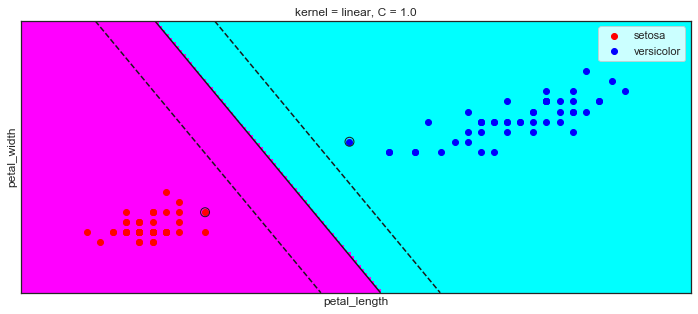

In [11]:
N = 50
X = iris[['petal_length' , 'petal_width']][: 100].values
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 
y = y.reshape((2*N, ))
    
decision_plot(X, y, 'linear', "setosa", "versicolor", 'petal_length', 'petal_width', 'red', 'blue', 'k', plt.cm.cool)

or we can import the **`plot_decision_regions`** from **`mlxtend.plotting`**, for example

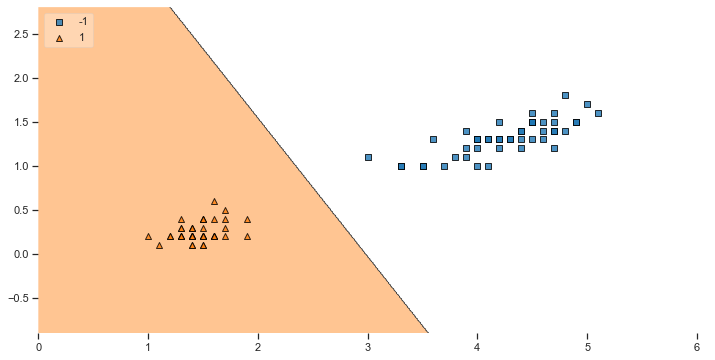

In [12]:
from mlxtend.plotting import plot_decision_regions
y = np.array(N*[1] + N*[-1])
plt.figure(figsize = (12, 6))
plot_decision_regions(X, y, clf = SVC(kernel = 'linear').fit(X, y), legend=2)

##### Example 1.2.

The dataset is still `linearly seperable`, we use "sepal_width" and "sepal_length" for "setosa" & "versicolor"; but there are noises in the dataset.

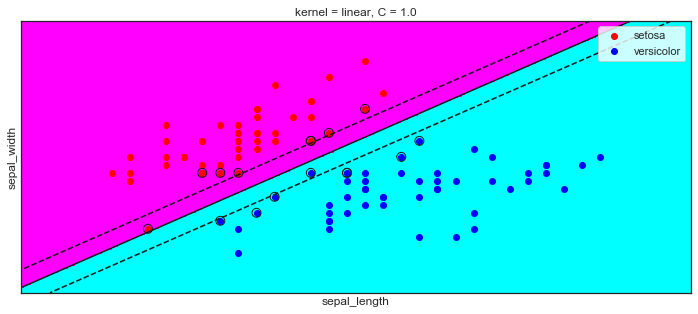

In [13]:
N = 50
X = iris[['sepal_length' , 'sepal_width']][: 100].values
y = np.array(N*[1] + N*[-1])

decision_plot(X, y, 'linear', "setosa", "versicolor", 'sepal_length', 'sepal_width', 'red', 'blue', 'k', plt.cm.cool)

In this case, there are some noises, such as the `red dots` which is near to the `decision boundary` (and near the `blue class`). Because the dataset looks like `linearly seperable` but the `noise` make the `support vectors` be shrinker. So we can say that the `margin` is extremly sensitive to noise!  

##### Example 1.3.  When the dataset is not `linearly seperable`.

We still consider `'petal_length' & 'petal_width'` but for the last 100 observations (focus on `"versicolor" and "virginica"`).

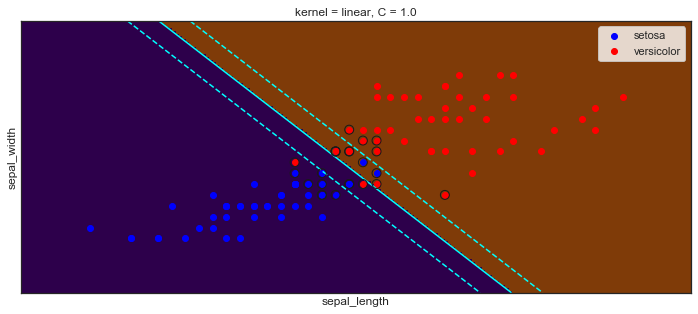

In [14]:
X = iris[['petal_length' , 'petal_width']][50: ].values
N = 50
y = np.array(N*[1] + N*[-1])

decision_plot(X, y, 'linear', "setosa", "versicolor", 'sepal_length', 'sepal_width', 
              'blue', 'red', 'cyan', plt.cm.PuOr)

In this case, the dataset is not linearly seperable, some observations of `class 1` is in `class -1` and some of `class -1` is in `class 1`; the `kernel = "linear"` in this case leads the `feasible set` be empty.

**Summary: Some disadvantages of `SVM`:** 
    - 1) When N large enough, finding lambda in this problem is impossible!!
    - 2) When the dataset is not `linearly seperable` then `SVM(kernel = "linear")` is not efficient.
    - 3) Even the dataset is `linearly seperable` but there are some `outlier`(and `noise`) then the margin is 
    extremly sensitive to noise!
    
So we will improve this by change the `hard-margin` (the distance between the `support vector` and the `hyperplane` in case `kernel = linear`) to **`soft-margin`**.

------------------------

## 2. Soft Margin SVM & Kernel SVM
In this section, we will study how to classifier the two-classes dataset when the features is not `linearly seperable`, even `multi-class`

| Neural network model       | Type of SVM     | Datasets                      | Number of classes |
|------------------------|-----------------|-------------------------------|-------------------|
| Perceptron Learning    | Hard-margin SVM | linearly separable            |  only 2           |
| Logistic Regression    | ***Soft-margin SVM*** | `almost linear seperable`       | only 2            |
| Softmax Regression     | Multi-class SVM | more than 2 labels in respone (boundary be linear) | multi-class       |
| Multi-layer Perceptron | ***Kernel SVM***      | nonlinearly separable         | multi-class       |

------------------------
### 2.1. `Soft margin SVM`
In the preceding example, if we ignore / remove the noise, then the `SVM(kernel ="linear")` will return the better `support vector`. Hence, to improve the `hard-margin` (to `soft-margin`), we add a constant `C` to the `objective function`, and  for every data point $\mathbf{x}_n$ we add a `slack variable` $\xi_n$, so the optimal problem becomes

$$ \begin{array}{ccl}
(P_{\text{org}}) & : & \left(\textbf{w}^{*},b^{*}\right)= \displaystyle \underset{\left(\textbf{w},b\right)}{\text{argmin}} \frac{1}{2} \Vert\textbf{w}\Vert_{2}^2 + C \sum_{n=1}^N \xi_n,\\
\text{s.t.} & : & f_n(\mathbf{x}) = 1 - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) \leq 0, \quad \forall n = 1, \ldots, N.
\end{array} $$

------------------------

The idea of the `slack variable` is very simple, the distance $d(z, A) = 0$ if $z$ is in the closure of $A.$

**Slack variable.** Let the value $\xi_n$ be the distance of $\textbf{x}_n$ from `its corresponding class’s margin` if $\textbf{x}_n$ is on the wrong side of the margin, otherwise zero.

Now we denoted $U_R$ be the `region` which `contains` the `removing noise` (or restricted by the 2 `support vector`), in the figure below, $U_R$ is the region bounded by the 2 `dashed green lines`.

In the image below, we see that

- when $\xi_n = 0$ then the datapoint $\textbf{x}_n \in U_R^c$ or it is in the `right side` and `right class`.
- when $\xi_n \in (0, 1)$ corresponding to $\textbf{x}_n \in U_R$ but $\textbf{x}_n$ is still in the `true class` (for example, the datapoints $(0.5, -0.5)$)
- when $\xi_n = 1$, then $\textbf{x}_n$ is on the `decision boundary` (for example, $(0, -1)$ and $(1, 1)$)
- when $\xi_n > 1$ then $\textbf{x}_n$ is in the `wrong side` and `wrong class` (for example $(1, -1)$ )

------------------------

The constant $C > 0$ plays the role as a **`"regularization parameter"`**. In this sense, `soft margin` formulation would also help in avoiding the `overfitting problem`.

In `sklearn`, to state `C`

In [15]:
clf = SVC(C = 1)

Now, the `hard constraint` $f_n(\mathbf{x}) = 1 - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) \leq 0$ will be modified to

$$ g_n(\mathbf{x}) = 1 - \xi_n - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) \leq 0 $$

so we will solve the `new` optimal problem

$$ \begin{array}{ccrcl}
(P_\text{org}) & : & \left(\textbf{w}^{*},b^{*}, \xi^{*}\right) &=& \displaystyle \underset{\left(\textbf{w}, b, \xi\right)}{\text{argmin}} \frac{1}{2} \Vert\textbf{w}\Vert_{2}^2 + C \sum_{n=1}^N \xi_n,\\
\text{s.t.} & : & g_n(\mathbf{x}) = 1 - \xi_n - y_{n} \left(\mathbf{w}^{T}\mathbf{x}_{n}+b\right) &\leq& 0, \quad \forall n = 1, \ldots, N. \\
 & & - \xi_n &\leq& 0, \quad \forall n
\end{array} $$

------------------------

By the constraint on $\xi_n$, we obtain

$$ \begin{array}{ccrcl}
(P_{\text{org}}) & : & \left( \textbf{w}^{*},b^{*} \right) & =& {\displaystyle \underset{\left(\textbf{w},b\right)}{\text{argmin}} J\left( \textbf{w}, b \right), } \\ \text{s.t.} & : & \xi_{n}^{*} & = & \max \lbrace 0, 1 -y_{n} \left(\textbf{w}^{T} \textbf{x} + b \right) \rbrace, \quad \forall n=1,\ldots,N. \end{array} $$

where $$ J\left( \textbf{w}, b \right) = \dfrac{1}{2} \Vert \textbf{w} \Vert_{2}^{2} + C \sum_{n=1}^{N} \max \left( \lbrace 0, 1 -y_{n} \left( \textbf{w}^{T} \textbf{x} + b \right) \rbrace \right) $$ be considered as a **`loss function`**.



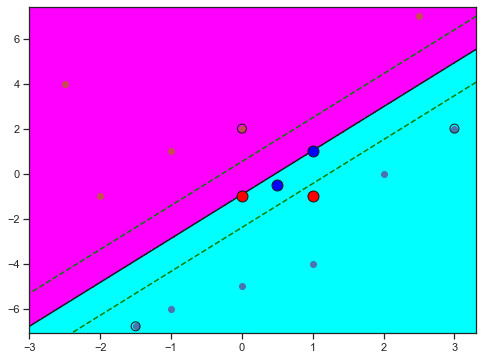

In [16]:
### ......................... Hiden code .............................. ##
N = 7
C1 = np.array([[-2.5, 4], [-2, -1], [-1, 1], [0, 2], [0, -1], [1, -1], [2.5, 6.99]])
C2 = np.array([[-1, -6], [0, -5], [1, -4], [3, 2], [2, 0], [1, 1], [-1.5, -6.79] ])
X = np.concatenate((C1, C2))
t = np.linspace(-3, 3.3, 100)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 
Y = y.reshape((2*N, ))

clf = SVC(kernel='linear')
clf.fit(X, Y)

fignum = 1

plt.figure(fignum, figsize=(8, 6))
plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')

plt.axis('tight')
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap= plt.cm.cool) 
plt.contour(XX, YY, Z, colors=['green', 'k', 'green'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])


## display
plt.plot(C1[:, 0], C1[:, 1], 'ro')
plt.plot(C2[:, 0], C2[:, 1], 'bo')
Z1 = np.array([[0, -1], [1, -1]])
Z2 = np.array([[1, 1], [0.5, -0.5]])
## ve hinh tron cho cac dau cham
plt.scatter(Z1[:, 0], Z1[:, 1], s=120,
                facecolors='red', zorder=20, edgecolors='k')
plt.scatter(Z2[:, 0], Z2[:, 1], s=120,
                facecolors='blue', zorder=20, edgecolors='k')
plt.xlim(-3, 3.3)
plt.ylim(-7.1, 7.4)
plt.show()

**Some comments on the constant `C` (`C > 0`).** 
- $C$ is a hyperparameter that decides the `trade-off` between `maximizing` the `margin` $\Vert \textbf{w} \Vert_2^2$ and `minimizing` the `mistakes` $\sum_{n=1}^N \xi_n$.
- When $C$ is `small`, classification mistakes are given less importance and focus is more on maximizing the margin, whereas when $C$ is `large`, the focus is more on avoiding misclassification at the expense of keeping the margin small.
- When $C$ is `too large`, this may lead to $\sum_{n=1}^N \xi_n = 0$ and the two classes is linear seperable.

-------------------

**Lagrange multiplier.**

By these constraints, our objective is to minimize the following function:

$$ L\left(\textbf{w},b,\xi,\lambda,\mu\right)=\dfrac{1}{2}\Vert\textbf{w}\Vert_{2}^{2}+C\sum_{n=1}^{N}\xi_{n}+\sum_{n=1}^{N}\lambda_{n}\left[y_{n}\left(\textbf{w}^{T}\textbf{x}+b\right)-1+\xi_{n}\right]-\sum_{n=1}^{N}\mu_{n}\xi_{n} $$
where $\lambda=\left(\begin{array}{c} \lambda_{1}\\ \vdots\\ \lambda_{N} \end{array}\right)$, $\mu=\left(\begin{array}{c} \mu_{1}\\ \vdots\\ \mu_{N} \end{array}\right)$, $\xi=\left(\begin{array}{c} \xi_{1}\\ \vdots\\ \xi_{N} \end{array}\right)$ with the noting that $\lambda_n, \mu_n \geq 0, \quad \forall n = 1, \ldots, N$

------------------------

The **`conjugate function`** 

$$ L_{\text{conj}}\left(\mu,\lambda\right)=\inf_{ \left( \textbf{w},b,\xi \right) }L\left(\textbf{w},b,\xi,\lambda,\mu\right) $$

Do the same thing as we did for `hard-margin` (in section 1), so we have

$$ \left\lbrace\begin{array}{cclcl}
\dfrac{\partial L}{\partial\textbf{w}}=0 & \Leftrightarrow & \textbf{w}-\sum_{n=1}^{N}\lambda_{n}y_{n}\textbf{x}_{n}=0 & \Leftrightarrow & \textbf{w} = \sum_{n=1}^{N}\lambda_{n}y_{n}\textbf{x}_{n} \\
\dfrac{\partial L}{\partial b}=0 & \Leftrightarrow & \sum_{n=1}^{N}\lambda_{n}y_{n} = 0  \\
\dfrac{\partial L}{\partial\xi_{n}}=0 & \Leftrightarrow & C-\lambda_{n}-\mu_{n}=0 & \Leftrightarrow & \lambda_n = C - \mu_n
\end{array}\right. $$

which deduce the `conjugate problem`

$$ \begin{array}{cclcl}
\left(P_{\text{conj}} \right) & : & \lambda & = & \underset{\lambda}{\text{argmax }} L_{\text{conj}} \left( \mu, \lambda \right) \\
\left(\text{constraint}\right) & : & \left( \lambda_{n},\mu_{n} \right) & \in & \left \lbrace \lambda_{n},\mu_{n}\geq 0 \left. \right \vert \lambda_{n}+\mu_{n} = C \right \rbrace, \quad \forall n = 1, \ldots, N.\\
& & \sum_{n=1}^N \lambda_n y_n &=& 0
\end{array} $$

where

$$ L_{\text{conj}} \left( \mu, \lambda \right) = \sum_{n=1}^{N}\lambda_{n}-\dfrac{1}{2}\sum_{n,m=1}^{N} \lambda_{n} \lambda_{n} y_{n} y_{m} \textbf{x}_{n}^{T} \textbf{x}_{m}. $$


------------------------

**Comments on $\lambda$**
- When $\lambda_n = 0$ then $\mu_n = C > 0$ which implies that $\xi_n = 0$ or $\textbf{x}_n$ is in the `right side` and `right-class`
- When $\lambda_n \in (0, C)$ then $\mu_n \neq 0$ leads to $\mu_n \xi_n = 0$ only if $\xi_n = 0$; this implies that 
$$ \lambda_{n}\left[1-\xi_{n}-y_{n}\left(\textbf{w}^{T}\textbf{x}_n + b\right) \right]=0 \Leftrightarrow 1 - y_{n}\left(\textbf{w}^{T}\textbf{x}_n + b\right) = 0 $$
or $\textbf{x}_n$ is in the `support vector`
- When $\lambda_n = C$ then $\mu_n = 0$.

------------------------

The **`KKT condition`** of the `soft-margin SVM`'s optimal problem be:

$$ (\text{K.K.T.}) \left\lbrace\begin{array}{rcl}
g_{n}\left(\textbf{x}\right)= 1 - \xi_{n}-y_{n}\left(\textbf{w}^{T}\textbf{x}+b\right) &\leq &0\\
\xi_{n},\lambda_{n},\mu_{n} &\geq & 0\\
\mu_{n}+\lambda_{n} & = & C \\
\mu_{n}\xi_{n} & = & 0\\
\textbf{w} & = &\sum_{n=1}^{N}\lambda_{n}y_{n}\textbf{x}_{n}\\
\lambda_{n} \left[1-\xi_{n}-y_{n} \left(\textbf{w}^{T}\textbf{x}+b\right)\right] & = &0\\
\sum_{n=1}^{N}\lambda_{n}y_{n} & = &0
\end{array}\right. $$

and we get

$$ \left\lbrace \begin{array}{rcl}
\textbf{w} & = & {\displaystyle \sum_{m\in\mathcal{W}}\lambda_{m}y_{m}\textbf{x}_{m}}\\
b & = & {\displaystyle \dfrac{1}{\vert\mathcal{M}\vert}\sum_{m\in\mathcal{M}}\left(1-\sum_{m\in\mathcal{W}}\lambda_{m}y_{m}\textbf{x}_{m}^{T}\textbf{x}_{n}\right)}
\end{array}\right. $$

where

$$ \mathcal{M} = \lbrace n : \lambda_n \in (0, C) \rbrace , \text{ and } \mathcal{W} = \mathcal{M} \cup \lbrace n : \lambda_m = C \rbrace $$

and the class of the data-point $\textbf{x}_n$ is the sign of the term 

$$ \textbf{w}^T\textbf{x} + b = {\displaystyle \sum_{m\in\mathcal{W}}\lambda_{m}y_{m}\textbf{x}_{m}^T \textbf{x}_n} + {\displaystyle \dfrac{1}{\vert\mathcal{M}\vert}\sum_{m\in\mathcal{M}}\left(1-\sum_{m\in\mathcal{W}}\lambda_{m}y_{m}\textbf{x}_{m}^{T}\textbf{x}_{n}\right)} $$

**Example 2.1**. Now we will

In [17]:
X = iris[['sepal_length' , 'sepal_width']][: 100].values
N = 50
y = np.array(N*[1] + N*[-1])

C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y) 

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]
print(w_sklearn.T, b_sklearn)

[[-6.31408573  5.26221019]] 17.309805156050132


In [18]:
X1 = iris[['sepal_length' , 'sepal_width']][: 50].values
X2 = iris[['sepal_length' , 'sepal_width']][50: 100].values
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels
y = y.reshape((2*N, 1))

V = np.concatenate((X1.T, -X2.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))

h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))
A = matrix(y.reshape((-1, 2*N))) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])

S = np.where(l > 1e-5)[0] # support set 
S2 = np.where(l < .999*C)[0] 

M = [val for val in S if val in S2] # intersection of two lists

XT = X.T # we need each column to be one data point in this alg
VS = V[:, S]
lS = l[S]
yM = y[M]
XM = XT[:, M]

w_dual = VS.dot(lS).reshape(-1, 1)
b_dual = np.mean(yM.T - w_dual.T.dot(XM))

## print solutions
print("w = ", w_dual.T) 
print("b = ", b_dual.T) 
print('lambda = \n', l.T)

w =  [[-6.31579006  5.26315727]]
b =  17.3157941800499
lambda = 
 [[5.97346746e-09 1.43385261e-08 4.20441036e-09 4.06906990e-09
  3.93606827e-09 5.42384227e-09 2.75122895e-09 5.72855268e-09
  3.81898317e-09 9.57220434e-09 9.25703180e-09 3.69799523e-09
  9.02999789e-09 2.81881413e-09 2.20364552e-08 4.20564253e-09
  5.42384227e-09 5.97346746e-09 4.45898536e-08 3.51975925e-09
  3.05691888e-08 4.06395195e-09 2.30748208e-09 1.09164455e-08
  3.69799523e-09 3.22211258e-08 5.72855268e-09 8.21114967e-09
  1.17613534e-08 4.20441036e-09 6.72862037e-09 3.05691888e-08
  2.85402996e-09 3.95555092e-09 9.57220434e-09 1.01947911e-08
  1.61909501e+01 3.32689068e-09 3.27945342e-09 7.77715289e-09
  4.66031651e-09 1.76040627e+01 2.61736671e-09 4.66031651e-09
  3.51975925e-09 9.02999789e-09 3.51975925e-09 3.48018811e-09
  6.53282803e-09 7.38995651e-09 1.56405650e-09 2.60323565e-09
  1.59142384e-09 3.35749305e-09 1.78108192e-09 5.37315215e-09
  3.66493693e-09 1.58175442e+01 1.74825581e-09 4.96725959e-08
  5.

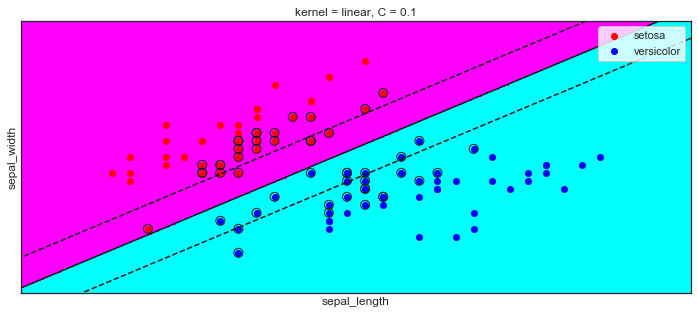

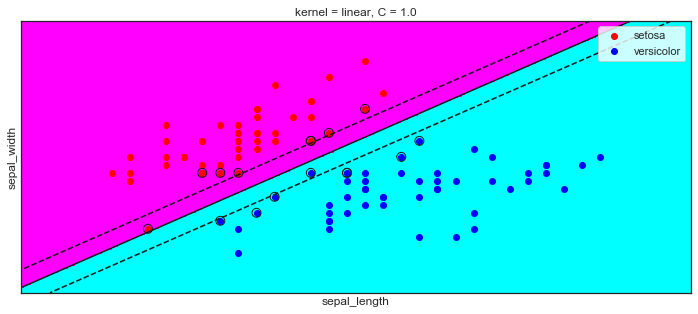

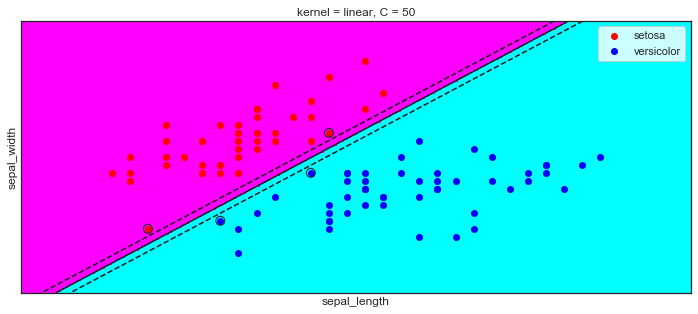

In [19]:
y = np.array(N*[1] + N*[-1])

decision_plot(X, y, 'linear', "setosa", "versicolor", 'sepal_length', 'sepal_width', 'red', 'blue', 'k', plt.cm.cool, C = 0.1)
decision_plot(X, y, 'linear', "setosa", "versicolor", 'sepal_length', 'sepal_width', 'red', 'blue', 'k', plt.cm.cool)
decision_plot(X, y, 'linear', "setosa", "versicolor", 'sepal_length', 'sepal_width', 'red', 'blue', 'k', plt.cm.cool, C = 50)

**Comments.**
- In this samples, only 1 data (the red point) is nearly on the `decision boundary`; the others data-points belongs to its true class.
- The larger `C` the smaller margin.

Now, checking again with the various of `C`

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
C_list = [0.01, 0.1, 1, 10, 50]

acc_train = []
acc_test = []
for C in C_list:
    clf = SVC(kernel = 'linear', C = C)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

df = pd.DataFrame({'C': C_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df = df.set_index('C')
df

,training accuracy,testing accuracy
C,,
0.01,0.537313,0.424242
0.10,1.000000,1.000000
1.00,1.000000,1.000000
10.00,1.000000,1.000000
50.00,1.000000,1.000000


**Example 2.2** `SVM` classification by using `train_test_split` to predict the acc_score on the test_set when increasing `C` in another dataset. Firstly, we see that

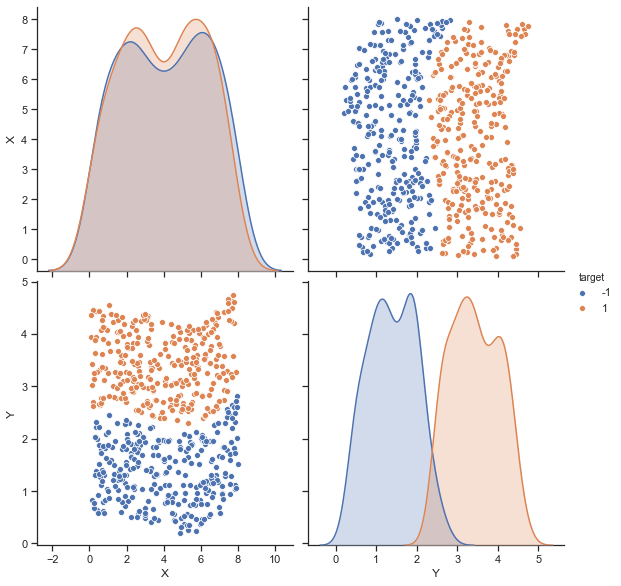

In [21]:
new_df = pd.read_excel(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\game.xlsx")

sns.pairplot(new_df, hue = "target", height = 4)
X = new_df[['X', 'Y']].values
y = np.array(300*[1] + 300*[-1])

What happen if using `kernel = linear` to plot the `decision boundary`?

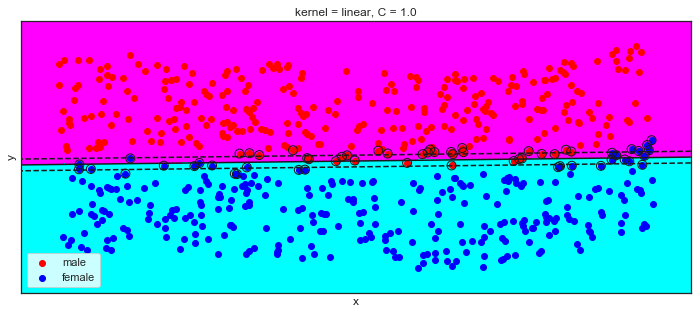

In [22]:
decision_plot(X, y, 'linear', "male", "female", 'x', 'y', 'red', 'blue', 'k', plt.cm.cool)

In this case, the dataset is not `linearly seperable`, hence the prediction and `accuracy_score` on the `test-set` will be worse (a little)!

,C,training accuracy,testing accuracy
0,0.001,0.885473,0.864646
1,0.010,0.945174,0.889899
2,0.100,0.945174,0.894949
3,0.500,0.947662,0.894949
4,1.000,0.942687,0.894949
5,10.000,0.945174,0.894949
6,50.000,0.947662,0.889899
7,100.000,0.947662,0.889899


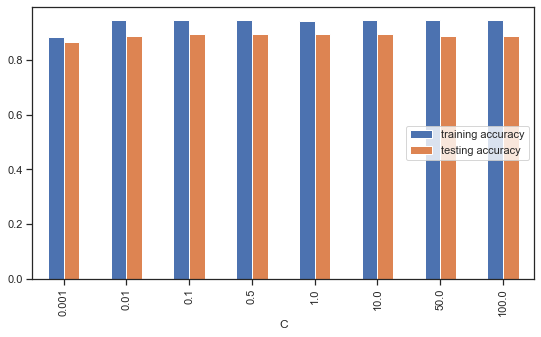

In [23]:
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

C_list = [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100]
acc_train = []
acc_test = []
for C in C_list:
    clf = SVC(kernel = 'linear', C = C)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

df = pd.DataFrame({'C': C_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df.plot(x = 'C', kind = 'bar', figsize = (9, 5))
plt.legend(loc = 'center right')
df

To improve the classification in the example 2.2, we must change the `kernel`!

In the `sklearn.svm.SVC`, we have 4 kinds of `kernel` : `"poly", "rbf", "sigmoid"` and `"linear"`. 

### 2.2. Kernel SVM
- When we don’t have linear separable set of training data like the example above (in real life scenario most of the data-set are quite complicated), the Kernel trick comes handy. The idea is `mapping the non-linear separable data-set into a` **`higher dimensional space`** `where we can find a hyperplane that can separate the samples`.
- To image easier the idea of `kernel SVM`, we first create the data-points shaped a circle, as follow

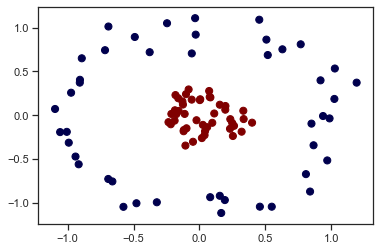

In [24]:
from sklearn.datasets import make_circles
X,y = make_circles(90, factor=0.2, noise=0.1) 

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='seismic')
plt.show()

**Road map when extending to the higher dimension.**

- For example, for $\textbf{x} = (x_1, x_2)$; we take 

$$ x_3 = \Phi(\textbf{x}) = x_1^2 + x_2^2$$

the higer dimension now becomes a subset on $\mathbb{R}^3$. 

- Then, we can find a `decision hyperplane` to seperate the new dataset $\left( x_1, x_2, x_3 \right)$ (`parabolic shape`).

- The intersection of the `hyperplane` and the `parabolic` be a `disc`.

- The projection of a `disc`on the 2 first dimension (which contains the original dataset) is a `circle`.

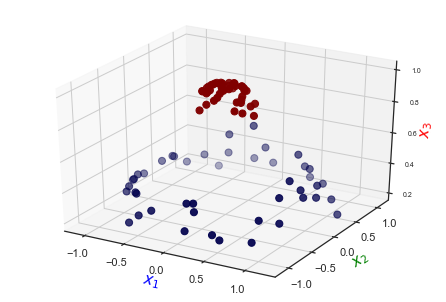

In [25]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

r = np.exp(-(X**2).sum(1))
zaxis = [0.2,0.4,0.6,0.8, 1.0]
zaxislabel = [r'0.2',r'0.4', r'0.6', r'0.8', r'1.0']

fig = plt.figure()
ax = Axes3D(fig)


def plot3dim():
    ax.scatter(X[:,0], X[:,1], r, c=y, s=50, cmap='seismic')
    ax.set_xlabel('$x_1$', fontsize=15, labelpad= 3, color='blue')
    ax.set_ylabel('$x_2$', fontsize=15, labelpad= 3, color='green')
    ax.set_zlabel('$x_3$', fontsize=15, labelpad=-1, color='red')
    ax.set_zticklabels(zaxislabel, fontsize=7)
    ax.set_zticks(zaxis)
    ax.grid('False')
    return fig, 

def animate(k):
    ax.view_init(elev=k,azim=30)
    #return fig, 

ani = animation.FuncAnimation(fig, animate, init_func = plot3dim,
                              frames = 360, interval = 30, blit = False)

plt.show()

**The `Lagrange multiplier` in `Kernel` SVM problem.** 

$$ L\left(\textbf{w},b,\xi,\lambda,\mu\right)=\dfrac{1}{2}\Vert\textbf{w}\Vert_{2}^{2}+C\sum_{n=1}^{N}\xi_{n}+\sum_{n=1}^{N}\lambda_{n}\left[y_{n}\left(\textbf{w}^{T} \Phi \left( \textbf{x} \right) +b\right)-1+\xi_{n}\right]-\sum_{n=1}^{N}\mu_{n}\xi_{n} $$ 

Likewise, we have

$$ \left\lbrace \begin{array}{ccl}
\dfrac{\partial L}{\partial\textbf{w}}=0 & \Leftrightarrow & \textbf{w}=\sum_{n=1}^{N}\lambda_{n}y_{n}\Phi\left(\textbf{x}_n \right)\\
\dfrac{\partial L}{\partial b}=0 & \Leftrightarrow & \sum_{n=1}^{N}\lambda_{n}y_{n}=0\\
\dfrac{\partial L}{\partial\xi_{n}}=0 & \Leftrightarrow & \lambda_{n}=C-\mu_{n}
\end{array}\right. $$

which deduce the `conjugate problem`

$$ \begin{array}{cclcl}
\left(P_{\text{conj}} \right) & : & \lambda & = & \underset{\lambda}{\text{argmax }} \displaystyle \sum_{n=1}^{N}\lambda_{n}-\dfrac{1}{2}\sum_{n,m=1}^{N} \lambda_{n} \lambda_{m} y_{n} y_{m} \Phi^{T} \left( \textbf{x}_{n} \right) \Phi \left( \textbf{x}_{m} \right) \\
\left(\text{constraint}\right) & : & \left( \lambda_{n},\mu_{n} \right) & \in & \left \lbrace \lambda_{n},\mu_{n}\geq 0 \left. \right \vert \lambda_{n}+\mu_{n} = C \right \rbrace, \quad \forall n = 1, \ldots, N.\\
& & \sum_{n=1}^N \lambda_n y_n &=& 0
\end{array} $$


and by solving the corresponding `KKT problem`, the class of the data-point $\textbf{x}_n$ is the sign of the term 

$$ \textbf{w}^{T}\textbf{x}+b={\displaystyle \sum_{n\in\mathcal{W}}\lambda_{n}y_{n}\Phi\left(\textbf{x}_{n}\right)^{T}\Phi\left(\textbf{x}\right)}+{\displaystyle \dfrac{1}{\vert\mathcal{M}\vert}\sum_{m\in\mathcal{M}}\left(1-\sum_{n\in\mathcal{W}}\lambda_{n}y_{n}\Phi\left(\textbf{x}_{n}\right)^{T}\Phi\left(\textbf{x}_{m}\right)\right)} $$ 

A disadvantage of computation the $\Phi\left( \textbf{x} \right)$ is when $N, d$ be large enough. As we see, we must calculate $\Phi\left( \textbf{x} \right)$, and $\Phi\left( \textbf{z} \right)$ then multiply them. To solve this problem, we use a technique called `kernel function`!

**Kernel tricks** Now, we consider the kernel

$$ K(\textbf{x}, \textbf{z}) = \Phi(\textbf{x})^T \Phi(\textbf{z}) $$ 

then

$$ \begin{array}{cclcl}
\left(P_{\text{conj}}^K \right) & : & \lambda & = & \underset{\lambda}{\text{argmax }} \displaystyle \sum_{n=1}^{N}\lambda_{n}-\dfrac{1}{2}\sum_{n,m=1}^{N} \lambda_{n} \lambda_{m} y_{n} y_{m} K \left( \textbf{x}_n, \textbf{x}_m \right) \\
\left(\text{constraint}\right) & : & \left( \lambda_{n},\mu_{n} \right) & \in & \left \lbrace \lambda_{n},\mu_{n}\geq 0 \left. \right \vert \lambda_{n}+\mu_{n} = C \right \rbrace, \quad \forall n = 1, \ldots, N.\\
& & \sum_{n=1}^N \lambda_n y_n &=& 0
\end{array} $$

and the class of $\textbf{x}$ depends on the sign of

$$ {\displaystyle \sum_{n \in \mathcal{W} } \lambda_{n} y_{n} K\left( \textbf{x}_{n}, \textbf{x} \right) } +{\displaystyle \dfrac{1}{ \vert \mathcal{M} \vert} \sum_{ m \in \mathcal{M} } \left( 1 -\sum_{n \in \mathcal{W} } \lambda_{n} y_{n} K \left( \textbf{x}_{n}, \textbf{x}_{m} \right) \right)}. $$ 

For example, the kernel function $K(\textbf{x}, \textbf{z}) = \left( 1 + \textbf{x}^T \textbf{z} \right)^2$ can be express as an inner product,

$$ \begin{array}{ccl}
\left(1+\textbf{x}^{T}\textbf{z}\right)^{2} & = & \left(1+\sum_{i=1}^{d}x_{i}z_{i}\right)^{2}\\
 & = & 1+2\sum_{i=1}^{d}x_{i}z_{i}+\sum_{i,j=1}^{d}x_{i}x_{j}z_{i}z_{j}\\
 & = & \Phi\left(\textbf{x}\right)\Phi\left(\textbf{z}\right)^{T}
\end{array} $$

where

$$ \Phi\left(\textbf{x}\right)=\left(1,\underset{d\text{ elements}}{\underbrace{x_{1}\sqrt{2},\ldots,x_{i}\sqrt{2},\ldots,x_{d}\sqrt{2}}},\underset{\frac{d(d-1)}{2}\text{ elements }(j<i)}{\underbrace{x_{1}^{2},\ldots,x_{i}x_{j},\ldots,x_{d}^{2}}}\right),\quad\forall j<i=\overline{1,\ldots,d} $$

and now the computation directly on $K(\textbf{x}, \textbf{z}) = \left( 1 + \textbf{x}^T \textbf{z} \right)^2$ is more convenient and efficient than calculation on $\Phi\left(\textbf{x}\right), \Phi\left(\textbf{z}\right)^{T}$

**Kernel's properties and Mecer condition.** Let $K : \mathbb{R}^{d} \times \mathbb{R}^d \to \mathbb{R}$ be a kernel function, then
- 1) $K \left( \textbf{x}, \textbf{z} \right) = K \left( \textbf{z}, \textbf{x} \right), \quad \forall \textbf{x}, \textbf{z}$
- 2) $K$ holds the `Mecer condition`, that is
$$ \sum_{n,m=1}^{N}K\left(\textbf{x}_{n},\textbf{x}_{m}\right)\alpha_{n}\alpha_{m}\geq0,\quad\forall\alpha_{k}\in\mathbb{R} $$
In practice; we can ignore this condition.

Noting that the kernel function which satisfied `Mecer condtition` leads to

$$ \textbf{K}=\left(\begin{array}{cccc}
y_{1}^{2}K\left(\textbf{x}_{1},\textbf{x}_{1}\right) & y_{1}y_{2}K\left(\textbf{x}_{1},\textbf{x}_{2}\right) & \ldots & y_{1}y_{N}K\left(\textbf{x}_{1},\textbf{x}_{N}\right)\\
y_{2}y_{1}K\left(\textbf{x}_{2},\textbf{x}_{1}\right) & y_{2}^{2}K\left(\textbf{x}_{2},\textbf{x}_{2}\right) & \ldots & y_{2}y_{N}K\left(\textbf{x}_{2},\textbf{x}_{N}\right)\\
\vdots & \vdots & \ddots & \vdots\\
y_{N}y_{1}K\left(\textbf{x}_{1},\textbf{x}_{1}\right) & y_{N}y_{2}K\left(\textbf{x}_{N},\textbf{x}_{2}\right) & \ldots & y_{N^{2}}K\left(\textbf{x}_{N},\textbf{x}_{N}\right)
\end{array}\right) $$

is a ***symetric & positive semi-define*** matrix, since

$$ \lambda^T \textbf{K} \lambda = \sum_{n=1}^N \sum_{m=1}^N K\left(\textbf{x}_{2},\textbf{x}_{N}\right) y_n y_m \lambda_n \lambda_m = \sum_{n=1}^N \sum_{m=1}^N K\left(\textbf{x}_{2},\textbf{x}_{N}\right) \left( y_n \lambda_n \right) \left( y_m \lambda_m \right) > 0, \quad \forall y_n \lambda_n \in \mathbb{R}, \forall \lambda. $$

and hence, the objective function of the problem $(P_{\text{conj}}^K)$ is still convex.

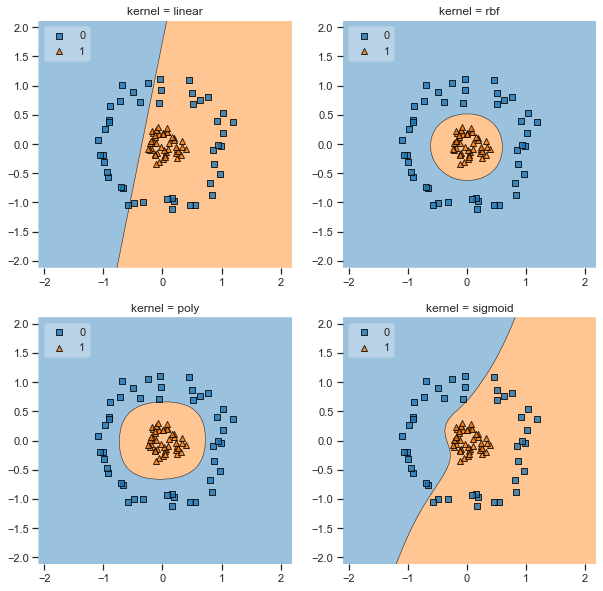

In [26]:
#f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14, 10))
kers = ['linear', 'rbf', 'poly', 'sigmoid']
plt.figure(figsize = (10, 10))
for k in range(4):
    plt.subplot(2, 2, k+1)
    plot_decision_regions(X, y, clf = SVC(kernel = kers[k], degree= 4, gamma = 2).fit(X, y), legend=2)
    plt.title('kernel = '+ kers[k])

As we discuss, there are 4 kinds of the `kernel` in `sklearn`, 

**2.2.1. Linear kernel.**

$$K\left( \textbf{x}, \textbf{z} \right) = \textbf{x}^T \textbf{z},$$

**2.2.2. Polynomial.**

$$K\left( \textbf{x}, \textbf{z} \right) = \left( r + \gamma \textbf{x}^T \textbf{z} \right)^d,$$

**2.2.3. Sigmoid.**

$$K\left( \textbf{x}, \textbf{z} \right) = \tanh \left( r + \gamma \textbf{x}^T \textbf{z} \right),$$

**2.2.4. Radial Basic Function (or Gauusian kernel)**

$$K\left( \textbf{x}, \textbf{z} \right) = \exp \left( -\gamma \Vert \textbf{x} - \textbf{z} \Vert^2 \right),$$

where
- $d$ be a `degree` of the polynomial.
- $\gamma > 0$ be a `kernel coefficient` for `‘rbf’, ‘poly’` and `‘sigmoid’`.
- $r$ be an `independent term` (or `zero coeficient`) in kernel function. It is only significant in `‘poly’` and `‘sigmoid’`.


**Beside the story**. The dataset `new_df` (**example 2.2**) can be seperated by the `3rd degree polynomial`

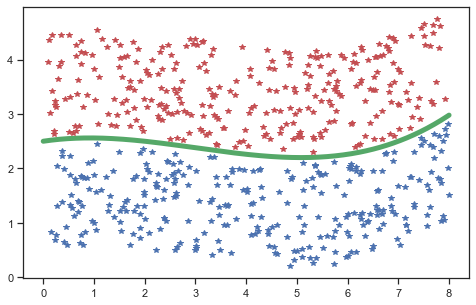

In [27]:
t = np.linspace(0, 8, 300)
f = 0.01*(250 + (t-7)*(t-2)*t)

X1 = new_df[['X', 'Y']][:300].values
X2 = new_df[['X', 'Y']][300:].values

plt.figure(figsize = (8, 5))
plt.plot(t, f, 'g', linewidth = 5)
plt.plot(X1[:, 0], X1[:, 1], 'r*')
plt.plot(X2[:, 0], X2[:, 1], 'b*')

Before verifying `kernel = "poly"`, what happen if we use `gamma = 2` with the `kernel = "linear"`

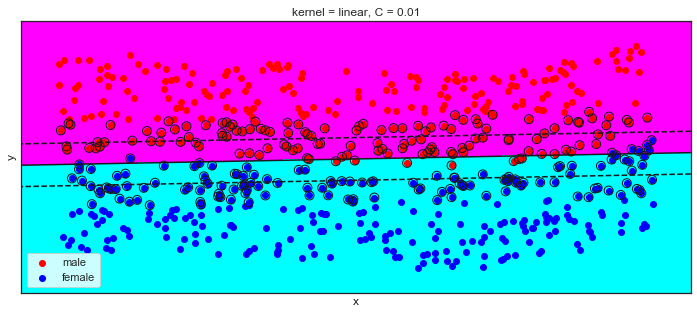

,training accuracy,testing accuracy
C,,
0.01,0.945174,0.934899
0.10,0.945174,0.939949
1.00,0.942687,0.939949
5.00,0.945174,0.939949
10.00,0.945174,0.939949
20.00,0.947662,0.934899


In [28]:
X = new_df[['X', 'Y']].values
y = np.array(300*[1] + 300*[-1])
decision_plot(X, y, 'linear', "male", "female", 'x', 'y', 'red', 'blue', 'k', plt.cm.cool, C = 0.01, gamma = 2)

C_list = [0.01, 0.1, 1, 5, 10, 20]

acc_train = []
acc_test = []
for C in C_list:
    clf = SVC(kernel = 'linear', C = C)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

df = pd.DataFrame({'C': C_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df = df.set_index('C')
df    

Now, **`kernel = "poly", degree = 3`**

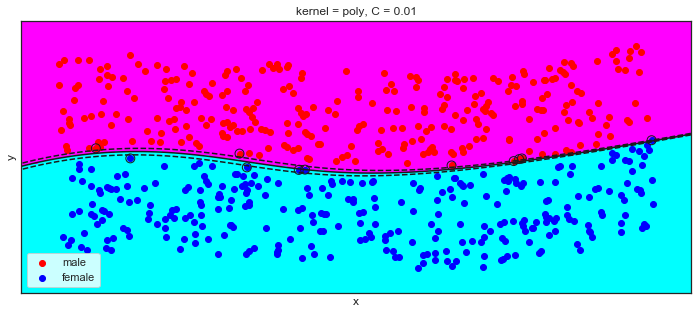

,training accuracy,testing accuracy
C,,
0.01,0.997512,0.994949
0.10,1.000000,1.000000
1.00,1.000000,1.000000
5.00,1.000000,1.000000
10.00,1.000000,1.000000
20.00,1.000000,1.000000


In [29]:
decision_plot(X, y, 'poly', "male", "female", 'x', 'y', 'red', 'blue', 'k', plt.cm.cool, C = 0.01, deg = 3, gamma = 2)

C_list = [0.01, 0.1, 1, 5, 10, 20]

acc_train = []
acc_test = []
for C in C_list:
    clf = SVC(kernel = 'poly', C = C, gamma = 2, degree = 3)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

df = pd.DataFrame({'C': C_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df = df.set_index('C')
df    

Next, **`kernel = "rbf"`**

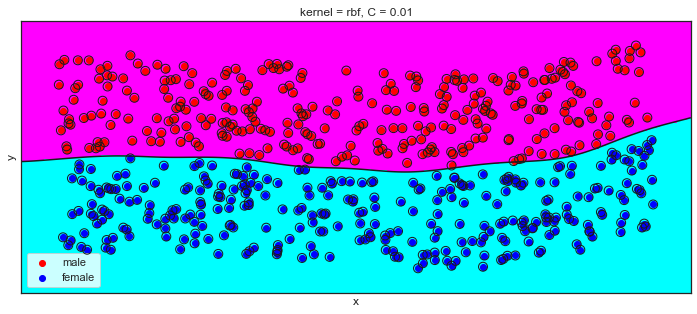

,training accuracy,testing accuracy
C,,
0.01,0.502488,0.470549
0.10,0.995025,0.970549
1.00,1.000000,0.965499
5.00,1.000000,0.970549
10.00,1.000000,0.970549
20.00,1.000000,0.970549


In [30]:
decision_plot(X, y, 'rbf', "male", "female", 'x', 'y', 'red', 'blue', 'k', plt.cm.cool, C = 0.01, deg = 3, gamma = 2)

C_list = [0.01, 0.1, 1, 5, 10, 20]

acc_train = []
acc_test = []
for C in C_list:
    clf = SVC(kernel = 'rbf', C = C, gamma = 2)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

df = pd.DataFrame({'C': C_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df = df.set_index('C')
df    

Finally, **`kernel = "sigmoid"`**

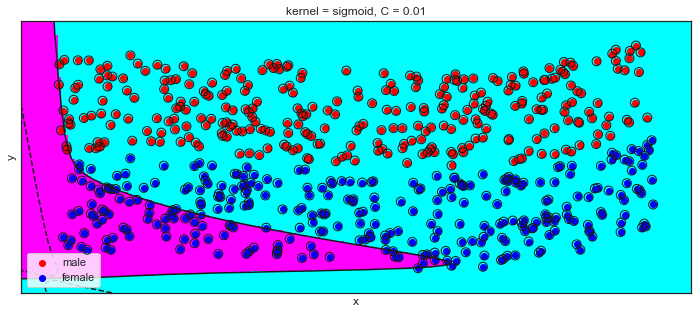

,training accuracy,testing accuracy
C,,
0.01,0.566488,0.572949
0.10,0.566488,0.572949
1.00,0.559025,0.562848
5.00,0.544100,0.552747
10.00,0.519224,0.547697
20.00,0.491861,0.517394


In [31]:
decision_plot(X, y, 'sigmoid', "male", "female", 'x', 'y', 'red', 'blue', 'k', plt.cm.cool, C = 0.01, deg = 3, gamma = 2)

C_list = [0.01, 0.1, 1, 5, 10, 20]

acc_train = []
acc_test = []
for C in C_list:
    clf = SVC(kernel = 'sigmoid', C = C, gamma = 2)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)) + 0.064)
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)) + 0.078)

df = pd.DataFrame({'C': C_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df = df.set_index('C')
df    

- Hence, in this dataset, the `kernel = "rbf"` gives the `best accuraccy score (0.999)` on the `test-set`; next is `kernel = 'poly'` (which gives `0.995`), then `kernel = "linear" (0.9),` while the `kernel = 'sigmoid'` can not seperate this data (when $\gamma = 2$). 
- This case in `kernel = 'sigmoid'`, the large $\gamma$ is not efficient.
- Moreover, both the trainning & testing accuraccy is `unchanged` w.r.t $C$, so we will modify $\gamma$ to small enough and let $C = 1$. 

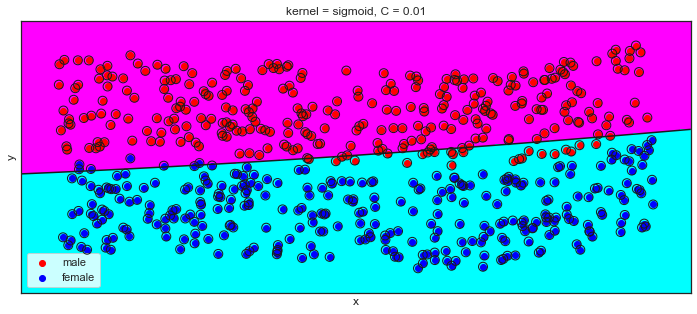

,training accuracy,testing accuracy
gamma,,
0.001,0.905473,0.958596
0.010,0.947761,0.988899
0.020,0.860697,0.908091
0.050,0.534826,0.478798
0.100,0.410448,0.352535


In [32]:
decision_plot(X, y, 'sigmoid', "male", "female", 'x', 'y', 'red', 'blue', 'k', plt.cm.cool, C = 0.01, deg = 3, gamma = 0.01)

gamma_list = [0.001, 0.01, 0.02, 0.05, 0.1]

acc_train = []
acc_test = []
for gamma in gamma_list:
    clf = SVC(kernel = 'sigmoid', C = 1, gamma = gamma)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

df = pd.DataFrame({'gamma': gamma_list, 'training accuracy': acc_train, 'testing accuracy': acc_test})
df = df.set_index('gamma')
df    

Finally, we have improved the `accuracy score` on the `test-set` with $\gamma = 0.01$ (which gives the `best_acc_score` is about `0.95`), still lower than the best scores in `kerel = 'rbf' (0.999)` and `kernel = 'poly (0.995)`.

---------------------
## 3. Multi-class SVM.

What happen if the objective in dataset's problem is not `binary classification`. 

Like to the technique in `Softmax Regression,` the `multi class SVM` will give an output layer by using a simple linear mapping:

$$ f\left(\textbf{x},\textbf{W},b\right)=\textbf{W}^{T}\textbf{x}+b $$

where 
- $\textbf{x} \in \mathbb{R}^d$ is an input data or `feature vector` (of course, $d$ is the `number of features`).
- $\textbf{W} \in \mathbb{R}^{d \times C}$ is a given matrix
- $b \in \mathbb{R}^C$ be a `bias vector` and $C \geq 2$ is the `number of classes` in this `multi-class` problem.

**3.1. Bias trick** As a matter of simplicity, let’s abbreviate our `scoring function` as 

$$ \textbf{z} = f \left( \textbf{W}_{\text{new}}, \textbf{x}_{\text{new}} \right)  \in \mathbb{R}^C, $$

where

$$ \left\lbrace\begin{array}{ccccc}
\textbf{W}_{\text{new}} & = & \left(\textbf{W}_{\text{org}}^{T},b\right)^T &\in & \mathbb{R}^{(d+1) \times C} \\
\textbf{x}_{\text{new}} & = & \left(\textbf{x}_{\text{org}}^{T},1\right)^{T} & \in & \mathbb{R}^{d+1}
\end{array}\right. $$

From now, to get more convenient, we denote $\textbf{x} := \textbf{x}_{\text{new}}$ and $\textbf{W} := \textbf{W}_{\text{new}}$. In the `softmax regression`, we have

$$ \textbf{z} = \text{softmax} \left( \textbf{W}^T \textbf{x} \right). $$

- Noting that now each column of $\textbf{W}$ (meant. $\textbf{W}_{\text{new}}$) is a class, so we must determine the $\textbf{W}$ such that the $z$ attains the maximum value at the observations-which corresponding to its `true class`.

- After trainning process, the label of an observations is the corrdinate of the `highest score` in the score vector, that meant
$$ y_n := y_{\text{pred}}\left( \textbf{x}_n \right) = \lbrace i^{\text{th}} : z_i = \max_{1 \leq k \leq C} z_k \left( \textbf{W}, \textbf{x}_n \right) \rbrace, $$
For instance, with $C = 5$ and $z \left( \textbf{x}_{10} \right) = \left( 29, 288, 121, 244, -121 \right)^T$ then $\textbf{x}_{10}$ is in the second class.

**3.2. The loss function in Multi-class SVM.**
- Firstly, if a datapoint $\textbf{x}$ is in class $y$ (where $1 \leq y \leq C$) and its `score vector` be $\mathbf{z}$ then we denote that $z_y = z_y \left( \textbf{x} \right) $ be the score of the `correct class (the highest score)` and $z_i = z_i\left( \textbf{x} \right)$ be the scores of the other classes (i.e. $i \neq y$). 

- Using this syntax, we can put it all together, obtaining the **`hinge loss`** function at $\textbf{x}_n$ be:
$$ \mathcal{L} \left( \textbf{x}_n, \textbf{z}_n \right) = \sum_{j \neq y_n} \max \lbrace 0, \Delta - z_{y_n}^n + z_{i}^n \rbrace $$
where $\Delta$ is the width of the `margin` and
$$ \textbf{z}_n := \textbf{z} \left( \textbf{x}_n \right) = \left( z_1 \left( \textbf{x}_n \right), \ldots, z_C \left( \textbf{x}_n \right) \right) := \left( z_1^{(n)} , z_2^{(n)}, \ldots, z_C^{(n)} \right). $$11
Hence, the **`total-loss function`** on the whole dataset $\textbf{X}$ be:

$$ \mathcal{L} \left( \textbf{X}, \textbf{y}, \textbf{W} \right) = \dfrac{1}{N} \sum_{n=1}^N \mathcal{L} \left( \textbf{x}_n, \textbf{z}_n \right) $$

where $\textbf{y}$ is the `label vector` contains the `correct class` in the `training set.`

**3.3. Regularization.** What will happen if $\mathcal{L} \left( \textbf{X}, \textbf{y}, \textbf{W} \right) = 0$? Obviously, in this case, then

$$ \Delta - z_{y_n}^n + z_{i}^n \leq 0, \quad \forall n = 1, \ldots, N, $$

equivalent with

$$ \Delta \leq \textbf{w}_{y_n}^T \textbf{x}_n + \textbf{w}_{j}^T \textbf{x}_n , \quad \forall n = 1, \ldots, N, $$
where $\textbf{w}_{j}$ is the $j^{th}$ column of $\textbf{W}$.

-------------

Hence, for all $k > 1$ then 
$$\mathcal{L} \left( \textbf{X}, \textbf{y}, k \textbf{W} \right) = 0, $$
and to improve this, we consider
$$ \mathcal{L}\left(\textbf{X},\textbf{y},k\textbf{W}\right)=\underset{\text{training loss}}{\underbrace{\dfrac{1}{N}\sum_{n=1}^{N}\mathcal{L}\left(\textbf{x}_{n},\textbf{z}_{n}\right)}}+\underset{\text{regularization loss}}{\underbrace{\dfrac{\lambda}{2}\Vert\textbf{W}\Vert_{\text{Frobenius}}^{2}}} $$
where $\lambda > 0$.

-------------

**Example 3.1.** Comeback the `iris` data with 3 classes `setosa(0), versicolor (1)` and `virginica (2)`.

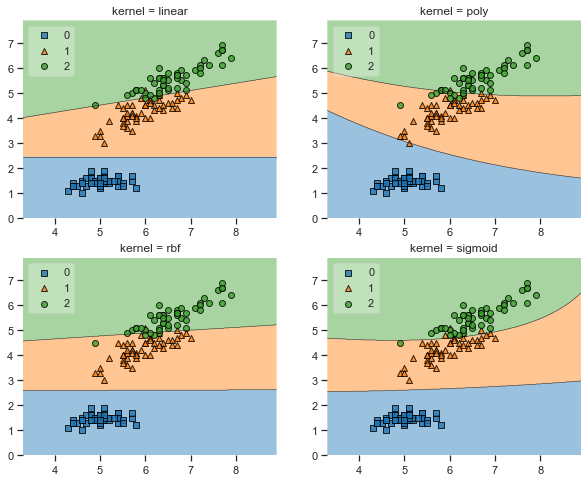

In [33]:
from sklearn.datasets import * 

iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize = (10, 8))
for k in range(4):
    plt.subplot(2,2,k+1)
    plot_decision_regions(X, y, 
                          clf = SVC(kernel = kernels[k], degree = 3, C = 10, gamma = 0.01).fit(X, y), 
                          legend = 2)
    plt.title("kernel = " + kernels[k])

- Look at the figure, this is too difficult to find the best `decision boundary`
- So, we will use `train-test-split` again and `Tuning Hyperparameters`: (`"Kernel", "Regularization (C)"` and `"gamma"` to find the best model to predict)

In [34]:
from sklearn.model_selection import GridSearchCV 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 11)

# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1, 10, 50],  
              'gamma': [10, 1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
              'degree': [2, 3, 4]
             }  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] C=0.01, degree=2, gamma=10, kernel=rbf ..........................
[CV]  C=0.01, degree=2, gamma=10, kernel=rbf, score=0.333, total=   0.0s
[CV] C=0.01, degree=2, gamma=10, kernel=rbf ..........................
[CV]  C=0.01, degree=2, gamma=10, kernel=rbf, score=0.333, total=   0.0s
[CV] C=0.01, degree=2, gamma=10, kernel=rbf ..........................
[CV]  C=0.01, degree=2, gamma=10, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.01, degree=2, gamma=10, kernel=rbf ..........................
[CV]  C=0.01, degree=2, gamma=10, kernel=rbf, score=0.619, total=   0.0s
[CV] C=0.01, degree=2, gamma=10, kernel=rbf ..........................
[CV]  C=0.01, degree=2, gamma=10, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.01, degree=2, gamma=10, kernel=linear .......................
[CV]  C=0.01, degree=2, gamma=10, kernel=linear, score=0.905, total=   0.0s
[CV] C=0.01, degree=2, gamma=10, kernel=linear ......................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, degree=3, gamma=1, kernel=rbf, score=0.333, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=0.01, degree=3, gamma=1, kernel=rbf, score=0.333, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=0.01, degree=3, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=0.01, degree=3, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=rbf ...........................
[CV]  C=0.01, degree=3, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=linear ........................
[CV]  C=0.01, degree=3, gamma=1, kernel=linear, score=0.905, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=linear ........................
[CV]  C=0.01, degree=3, gamma=1, kernel=linear, score=0.810, total=   0.0s
[CV] C=0.01, degree=3, gamma=1, kernel=linear ..................

[CV]  C=0.01, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.5s
[CV] C=0.01, degree=4, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=4, gamma=10, kernel=poly, score=0.952, total=   0.1s
[CV] C=0.01, degree=4, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=4, gamma=10, kernel=poly, score=1.000, total=   2.9s
[CV] C=0.01, degree=4, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=0.01, degree=4, gamma=10, kernel=poly .........................
[CV]  C=0.01, degree=4, gamma=10, kernel=poly, score=1.000, total=   0.5s
[CV] C=0.01, degree=4, gamma=1, kernel=rbf ...........................
[CV]  C=0.01, degree=4, gamma=1, kernel=rbf, score=0.333, total=   0.0s
[CV] C=0.01, degree=4, gamma=1, kernel=rbf ...........................
[CV]  C=0.01, degree=4, gamma=1, kernel=rbf, score=0.333, total=   0.0s
[CV] C=0.01, degree=4, gamma=1, kernel=rbf .................

[CV] C=0.1, degree=2, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.952, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.952, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.952, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=0.857, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=linear ......................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=2, gamma=0.01, kernel=si

[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.5s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=0.952, total=   0.2s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=1.000, total=   3.6s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=0.1, degree=4, gamma=10, kernel=poly ..........................
[CV]  C=0.1, degree=4, gamma=10, kernel=poly, score=1.000, total=   0.8s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=4, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=0.1, degree=4, gamma=1, kernel=rbf .........................

[CV]  C=1, degree=2, gamma=1, kernel=sigmoid, score=0.333, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=0.952, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=0.905, total=   0.0s
[CV] C=1, degree=2, gamma=1, kernel=poly .............................
[CV] . C=1, degree=2, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, degree=2, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=2, gamma=0.1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=1, degree=2, gamma=0.1, kernel=rbf ............................
[CV]

[CV]  C=1, degree=3, gamma=10, kernel=poly, score=0.952, total=   0.2s
[CV] C=1, degree=3, gamma=10, kernel=poly ............................
[CV]  C=1, degree=3, gamma=10, kernel=poly, score=0.952, total=   0.3s
[CV] C=1, degree=3, gamma=10, kernel=poly ............................
[CV]  C=1, degree=3, gamma=10, kernel=poly, score=1.000, total=   0.1s
[CV] C=1, degree=3, gamma=10, kernel=poly ............................
[CV]  C=1, degree=3, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=1, degree=3, gamma=10, kernel=poly ............................
[CV]  C=1, degree=3, gamma=10, kernel=poly, score=1.000, total=   0.3s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .

[CV]  C=1, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.6s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, score=0.952, total=   0.3s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, score=1.000, total=   4.3s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=1, degree=4, gamma=10, kernel=poly ............................
[CV]  C=1, degree=4, gamma=10, kernel=poly, score=1.000, total=   1.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=4, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=1, degree=4, gamma=1, kernel=rbf ..............................
[CV] .

[CV]  C=1, degree=4, gamma=0.001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, score=0.952, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, score=0.905, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=linear .......................
[CV]  C=1, degree=4, gamma=0.001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, score=0.333, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=4, gamma=0.001, kernel=sigmoid, score=0.333, total=   0.0s
[CV] C=1, degree=4, gamma=0.001, kernel=

[CV]  C=10, degree=3, gamma=10, kernel=poly, score=0.952, total=   0.4s
[CV] C=10, degree=3, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=3, gamma=10, kernel=poly, score=0.952, total=   0.4s
[CV] C=10, degree=3, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=3, gamma=10, kernel=poly, score=1.000, total=   0.5s
[CV] C=10, degree=3, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=3, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=10, degree=3, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=3, gamma=10, kernel=poly, score=1.000, total=   0.6s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.905, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[

[CV]  C=10, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.7s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, score=0.952, total=   0.2s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, score=1.000, total=   5.4s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=10, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=10, degree=4, gamma=10, kernel=poly, score=1.000, total=   1.2s
[CV] C=10, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=4, gamma=1, kernel=rbf, score=0.905, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=4, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=10, degree=4, gamma=1, kernel=rbf .............................
[

[CV]  C=50, degree=2, gamma=0.001, kernel=sigmoid, score=0.952, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=50, degree=2, gamma=0.001, kernel=sigmoid, score=0.857, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel=sigmoid .....................
[CV]  C=50, degree=2, gamma=0.001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=2, gamma=0.001, kernel=poly, score=0.905, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=2, gamma=0.001, kernel=poly, score=0.762, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=2, gamma=0.001, kernel=poly, score=0.667, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel=poly ........................
[CV]  C=50, degree=2, gamma=0.001, kernel=poly, score=0.810, total=   0.0s
[CV] C=50, degree=2, gamma=0.001, kernel

[CV]  C=50, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.8s
[CV] C=50, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=4, gamma=10, kernel=poly, score=0.952, total=   0.3s
[CV] C=50, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=4, gamma=10, kernel=poly, score=1.000, total=   5.4s
[CV] C=50, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=4, gamma=10, kernel=poly, score=0.905, total=   0.0s
[CV] C=50, degree=4, gamma=10, kernel=poly ...........................
[CV]  C=50, degree=4, gamma=10, kernel=poly, score=1.000, total=   1.3s
[CV] C=50, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=50, degree=4, gamma=1, kernel=rbf, score=0.905, total=   0.0s
[CV] C=50, degree=4, gamma=1, kernel=rbf .............................
[CV] . C=50, degree=4, gamma=1, kernel=rbf, score=0.952, total=   0.0s
[CV] C=50, degree=4, gamma=1, kernel=rbf .............................
[

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   41.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 50], 'degree': [2, 3, 4],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

We can inspect the best parameters found by **`GridSearchCV`** in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# print best parameter after tuning 
print('best_params: ', grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print('\nbest_estimator :\n', grid.best_estimator_)

# print the best score : the mean cross-validated score of the best_estimator
print('\nbest_training score: ', grid.best_score_)

print('\nclassification report : \n', classification_report(y_test, grid.predict(X_test) )) 

best_params:  {'C': 10, 'degree': 2, 'gamma': 10, 'kernel': 'linear'}

best_estimator :
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

best_training score:  0.980952380952381

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



Next, we will verify again with the `best_params_`

In [36]:
def svm_info(X_train, y_train, X_test, y_test, C, deg, gamma, kernel):
    clf = SVC(C = C, degree = deg, gamma = gamma, kernel = kernel)
    clf.fit(X_train, y_train)
    print('============== kernel ="',kernel,'"=================')
    print('++++++++++++++++++++ Start +++++++++++++++++++++++')
    print('Training accuracy :', accuracy_score(y_train, clf.predict(X_train)))
    print('++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('Testing accuracy :', accuracy_score(y_test, clf.predict(X_test)))
    print('++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('Confusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
    print('++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5)) 
    print('++++++++++++++++++++++++ End +++++++++++++++++++++++')
svm_info(X_train, y_train, X_test, y_test, 10, 2, 10, 'linear')

============== kernel =" linear "=================
++++++++++++++++++++ Start +++++++++++++++++++++++
Training accuracy : 0.9809523809523809
++++++++++++++++++++++++++++++++++++++++++++++++++
Testing accuracy : 0.9555555555555556
++++++++++++++++++++++++++++++++++++++++++++++++++
Confusion matrix : 
 [[14  0  0]
 [ 0 12  2]
 [ 0  0 17]]
++++++++++++++++++++++++++++++++++++++++++++++++++
Classification report : 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        14
           1    1.00000   0.85714   0.92308        14
           2    0.89474   1.00000   0.94444        17

    accuracy                        0.95556        45
   macro avg    0.96491   0.95238   0.95584        45
weighted avg    0.96023   0.95556   0.95508        45

++++++++++++++++++++++++ End +++++++++++++++++++++++


However, another kernel, such as `kernel - "rbf"` gives the lower `training accuracy` but attains a higer `testing accuracy` than the `kernel = 'linear'`. For example.

In [37]:
svm_info(X_train, y_train, X_test, y_test, 50, 2, 0.01, 'rbf')

============== kernel =" rbf "=================
++++++++++++++++++++ Start +++++++++++++++++++++++
Training accuracy : 0.9619047619047619
++++++++++++++++++++++++++++++++++++++++++++++++++
Testing accuracy : 0.9777777777777777
++++++++++++++++++++++++++++++++++++++++++++++++++
Confusion matrix : 
 [[14  0  0]
 [ 0 13  1]
 [ 0  0 17]]
++++++++++++++++++++++++++++++++++++++++++++++++++
Classification report : 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        14
           1    1.00000   0.92857   0.96296        14
           2    0.94444   1.00000   0.97143        17

    accuracy                        0.97778        45
   macro avg    0.98148   0.97619   0.97813        45
weighted avg    0.97901   0.97778   0.97768        45

++++++++++++++++++++++++ End +++++++++++++++++++++++


Finally, we will find the best_params for each kernel

Noting that: **`This function is for illustrative purposes only`**, readers can modify the `params_grid` in this function to obtain the better result.

In [38]:
def search_best_test_acc(X_train, y_train, X_test, y_test, kernel):
    param_grid = {'C': [0.01, 0.1, 1, 10, 50],  
                  'gamma': [10, 1, 0.1, 0.01, 0.001], 
                  'kernel': [kernel],
                  'degree': [2, 3, 4]
                 }  
    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
    grid.fit(X_train, y_train)
    print("============================= Kernel using :'",kernel,"'=============================")
    print('best_params: ', grid.best_params_) 
    print("================================================================================")
    print('best_estimator :\n', grid.best_estimator_)
    print("================================================================================")
    print('best_training score: ', grid.best_score_)
    print("================================================================================")
    print('classification report : \n', classification_report(y_test, grid.predict(X_test), digits = 5)) 
    print("==================================================================================")
search_best_test_acc(X_train, y_train, X_test, y_test, 'rbf')

============================= Kernel using :' rbf '=============================
best_params:  {'C': 50, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
best_estimator :
 SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_training score:  0.9714285714285715
classification report : 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        14
           1    1.00000   0.92857   0.96296        14
           2    0.94444   1.00000   0.97143        17

    accuracy                        0.97778        45
   macro avg    0.98148   0.97619   0.97813        45
weighted avg    0.97901   0.97778   0.97768        45



Hence, with the `kernel = "rbf"` and `params = {'C': 50, 'degree': 2, 'gamma': 0.01}` then 
- `training accuracy = 0.971`
- `testing accuracy` is about `0.9777` (look at the `f1-score-accuracy` in the preceding command line)

In [39]:
search_best_test_acc(X_train, y_train, X_test, y_test, 'poly')

============================= Kernel using :' poly '=============================
best_params:  {'C': 50, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
best_estimator :
 SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_training score:  0.980952380952381
classification report : 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        14
           1    1.00000   0.85714   0.92308        14
           2    0.89474   1.00000   0.94444        17

    accuracy                        0.95556        45
   macro avg    0.96491   0.95238   0.95584        45
weighted avg    0.96023   0.95556   0.95508        45



In [40]:
search_best_test_acc(X_train, y_train, X_test, y_test, 'sigmoid')

============================= Kernel using :' sigmoid '=============================
best_params:  {'C': 50, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
best_estimator :
 SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_training score:  0.9619047619047618
classification report : 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        14
           1    1.00000   0.92857   0.96296        14
           2    0.94444   1.00000   0.97143        17

    accuracy                        0.97778        45
   macro avg    0.98148   0.97619   0.97813        45
weighted avg    0.97901   0.97778   0.97768        45



Now, we will discuss the `cancer dataset`, which is a very famous multi-class classification problem. This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**Example 3.2.**

The dataset comprises 30 features (`mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer)`.

This data has two types of cancer classes: malignant (harmful) and benign (not harmful). Here, you can build a model to classify the type of cancer. The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library.

In [41]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

svm_info(X_train, y_train, X_test, y_test, 1, 2, 1, 'linear')

============== kernel =" linear "=================
++++++++++++++++++++ Start +++++++++++++++++++++++
Training accuracy : 0.964824120603015
++++++++++++++++++++++++++++++++++++++++++++++++++
Testing accuracy : 0.9649122807017544
++++++++++++++++++++++++++++++++++++++++++++++++++
Confusion matrix : 
 [[ 59   4]
 [  2 106]]
++++++++++++++++++++++++++++++++++++++++++++++++++
Classification report : 
               precision    recall  f1-score   support

           0    0.96721   0.93651   0.95161        63
           1    0.96364   0.98148   0.97248       108

    accuracy                        0.96491       171
   macro avg    0.96542   0.95899   0.96204       171
weighted avg    0.96495   0.96491   0.96479       171

++++++++++++++++++++++++ End +++++++++++++++++++++++


Likewise

In [43]:
search_best_test_acc(X_train, y_train, X_test, y_test, 'sigmoid')

============================= Kernel using :' sigmoid '=============================
best_params:  {'C': 0.01, 'degree': 2, 'gamma': 10, 'kernel': 'sigmoid'}
best_estimator :
 SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=10, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_training score:  0.625632911392405
classification report : 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        63
           1    0.63158   1.00000   0.77419       108

    accuracy                        0.63158       171
   macro avg    0.31579   0.50000   0.38710       171
weighted avg    0.39889   0.63158   0.48896       171



C:\Users\Admin\.conda\envs\projecy\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
search_best_test_acc(X_train, y_train, X_test, y_test, 'rbf')

============================= Kernel using :' rbf '=============================
best_params:  {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
best_estimator :
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best_training score:  0.9119303797468354
classification report : 
               precision    recall  f1-score   support

           0    0.86957   0.95238   0.90909        63
           1    0.97059   0.91667   0.94286       108

    accuracy                        0.92982       171
   macro avg    0.92008   0.93452   0.92597       171
weighted avg    0.93337   0.92982   0.93042       171



In [ ]:
search_best_test_acc(X_train, y_train, X_test, y_test, 'poly')

Hence, in this dataset, and looking at the `training_acc & testing_acc`; the `kernel = "linear"` is better than the other kernel! Of course, we can modify the grid_params in the function `search_best_score` to improve and find the better results!!